<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/findingbestfitdistribution_forPLTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.8 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


AttributeError: module 'scipy.stats' has no attribute '{'cauchy': {'loc': 0.002497677930612103, 'scale': 0.01710849114936057}}'

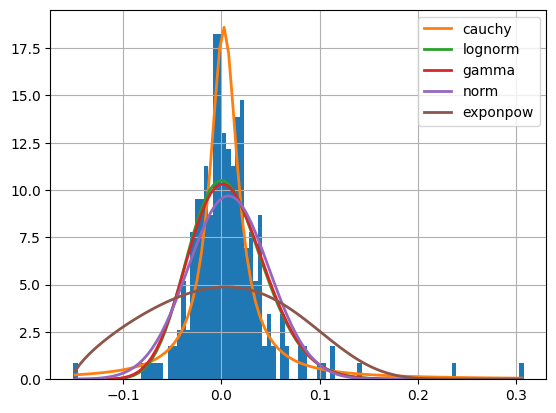

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from fitter import Fitter, get_common_distributions

# Step 1: Fetch Historical Stock Data
ticker = 'PLTR'
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=1)
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Calculate Daily Returns
data['Daily Return'] = data['Close'].pct_change().dropna()

# Step 3: Fit Various Distributions
returns = data['Daily Return'].dropna().values
f = Fitter(returns, distributions=get_common_distributions())
f.fit()

# Step 4: Evaluate Goodness-of-Fit
f.summary()

# Plot the best fit distribution
best_fit_name = f.get_best(method='sumsquare_error')
best_fit_name = str(best_fit_name)
best_fit_dist = getattr(stats, best_fit_name)
params = f.fitted_param[best_fit_name]

# Plot histogram of returns
plt.hist(returns, bins=50, density=True, alpha=0.6, color='g')

# Plot the best fit distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = best_fit_dist.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: {best_fit_name}"
plt.title(title)
plt.show()
